# Generalized Python function using Qiskit to perform modular exponentiation.
#### By Ahmed Saad El Fiky


The function takes(a, x, N), builds a quantum circuit and computes the value of (a^x mod N) in n qubits.

I assume that $ gcd(a, N) = 1 $ which is necessary to preserve the unitarity of performed operation.



***

In [2]:
!pip install qiskit
!pip install qiskit[visualization]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 33.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 78.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136816 sha256=4553e19bb69819665cd7abdf1ee0b05ced5f54720a07c5f1ce4d916c63f29eeb
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylatexenc


In [3]:
!pip install qiskit-aer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 39.8 MB/s eta 0:00:00


## Implementaion
### There are 2 conditions to be met: gcd(a, N) = 1 and 1 < a < N, to preserve the unitarity of the Ua gate.

In this function:

* We initialize the ‘l’ register to |1>.
* Apply controlled multiplications by ‘a’ based on the bits of ‘x’.
* Measure the ‘l’ register to obtain the result.

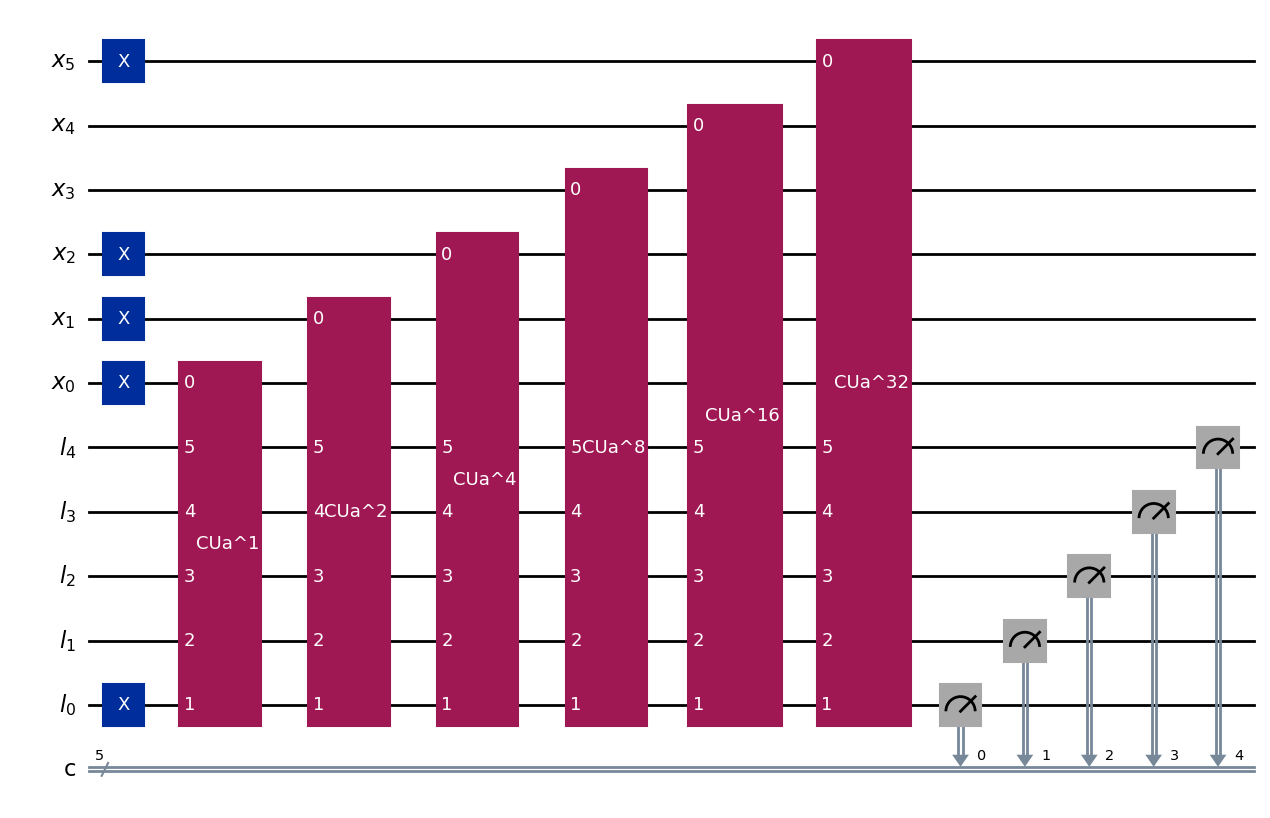

{'10100': 1024}
 The measured value from the Quantum circuit in binary = 10100
 The measured value from the Quantum circuit in decimal = 20
 The computed value mathematically = 20


In [11]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.circuit.library import UnitaryGate
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram
from math import log2, floor, ceil, gcd
import numpy as np


# Define the Modular exponentiation
def modular_exponentiation(a, x, N):

  # Initalize the quantum circuit
  e = 1/4   # Detemine the value of e # will be needed in the full circuit of Shor's Algorithm

  # Determine the number of qubits needed for N
  l = len(bin(N))-2
  t = len(bin(x))-2 #+ 1 + ceil(log2(2+(1/(2*e))))    # will be needed in the full circuit of Shor's Algorithm

  m = QuantumRegister(l, 'l')
  n = QuantumRegister(t, 'x')
  c = ClassicalRegister(l, 'c')
  qc = QuantumCircuit(m, n, c)

  # apply the initilize the 't' register and set its value to binary of "x"
  bi_x = bin(x)[2:]
  t = len(bi_x)
  for i in range(t):
    if bi_x[i] == "1":
      qc.x(n[t-i-1])

  # qc.h(n)   # will be needed in the full circuit of Shor's Algorithm

  # Initialze the 'l' register to |1>
  qc.x(m[0])

  # Define the CUa's functions
  CU = Ua(a, N).control(1)
  CU.name = 'CUa'

  for i in range(t):
    CUi = CU.power(2**i)
    qc.append(CUi, [n[i], *m])

  # Apply measurement on the 'l' register
  qc.measure(m, c)

  # Display the quantum circuit
  display(qc.draw('mpl', reverse_bits= True))

  # Simulate the quantum circuit
  aer_simulator = Aer.get_backend('qasm_simulator')
  result = aer_simulator.run(qc).result()
  counts = result.get_counts(qc)
  print(counts)
  # display(plot_histogram(counts))

  # Extract the measurement result
  measured_value = int(result.get_counts(qc).most_frequent(), 2)

  # Compute (a^x mod N)
  mod_exp_result = pow(a, x, N)

  # print the results
  print(f" The measured value from the Quantum circuit in binary = {result.get_counts(qc).most_frequent()}")
  print(f" The measured value from the Quantum circuit in decimal = {measured_value}")
  print(f" The computed value mathematically = {mod_exp_result}")

  # return qc

# Define a function Ua to implement CU operator
def Ua(a, N):

  # Assure that input values meets the conditions
  assert gcd(a, N) == 1
  assert 1 < a < N

  # Determine the nunber of 'l' qubits required for the operation (Mod N):
  l = len(bin(N))-2

  # Initialize the Operator matrix to zeros
  u = np.zeros([2**l, 2**l], dtype=int)

  # Map the input states to its (a * i Mod N) output states for 0 <= i < N:
  for i in range(N):
    u[a*i%N][i] = 1

  # Apply the identity to the states above N (N <= i  < 2**l):
  for i in range(N, 2**l):
    u[i][i] = 1

  UA = UnitaryGate(u)
  UA.name = "Ua"

  return UA

modular_exponentiation(5, 39, 21)

In [ ]:
pow(5, 33, 21)

20

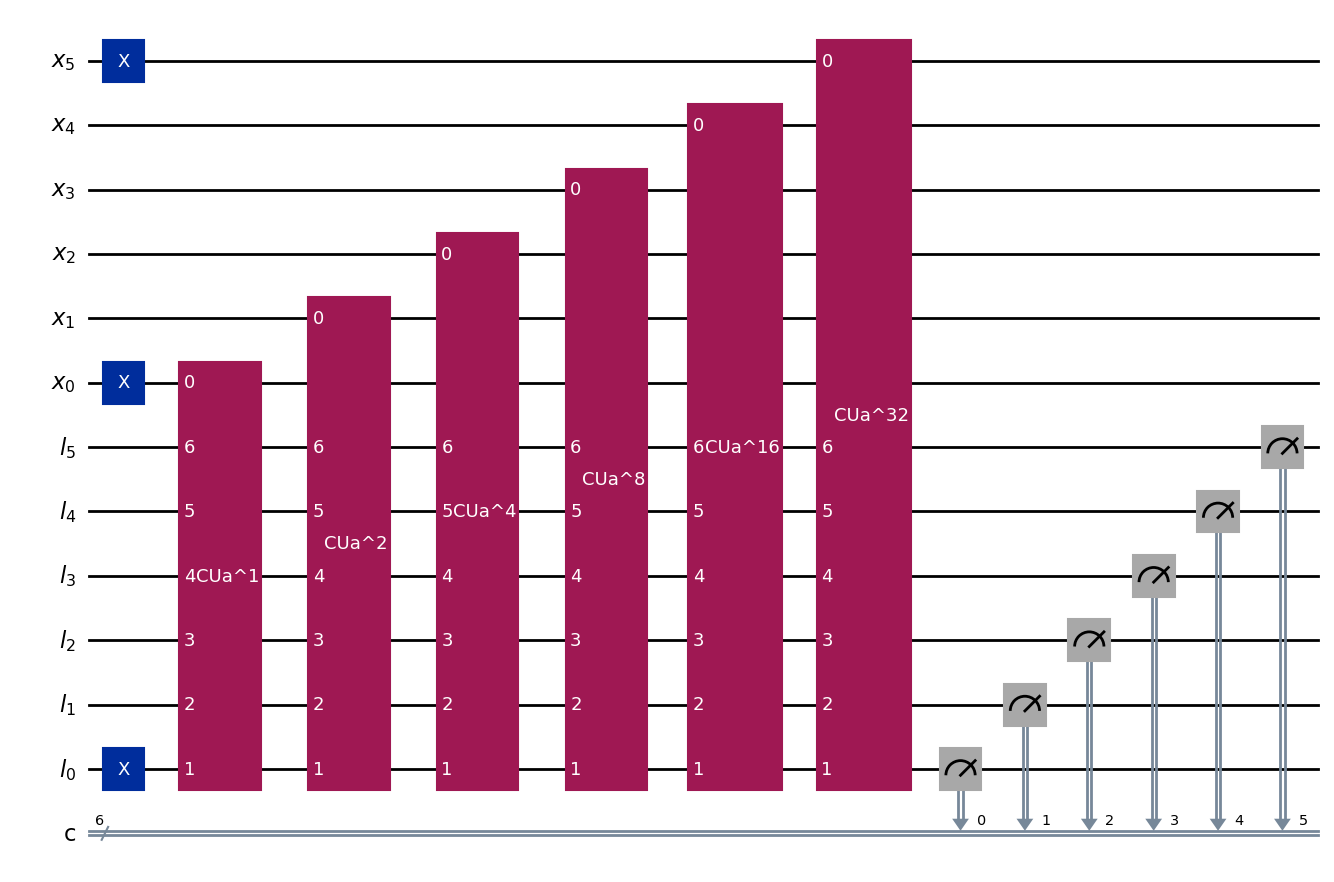

{'110111': 1024}
 The measured value from the Quantum circuit in binary = 110111
 The measured value from the Quantum circuit in decimal = 55
 The computed value mathematically = 55


In [ ]:
modular_exponentiation(31, 33, 63)

***